# This Notebook is a guide through the construction of a Neural Network using PyTorch
Author: Felix Regler

Based on lecture material by Daniel Wehner (DHBW Mannheim)

## Step 0: Setup and Resources

PyTorch Installation Guide: https://pytorch.org/get-started/locally/

For local use (ensure pip is updated):

        pip install torch torchvision




In [3]:
# Import core libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Check device (GPU/MPS/CPU)
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Using device:", device)

Using device: mps


In [4]:
# A single artificial neuron computes: z = w^T x + b; a = g(z)
# Where:
# - w: weight vector
# - x: input vector
# - b: bias
# - g: activation function

# Define a simple perceptron-like neuron with sigmoid activation
neuron = nn.Sequential(
    nn.Linear(3, 1),
    nn.Sigmoid()
)

# Forward pass with example input
x = torch.tensor([[0.5, -0.2, 1.0]], dtype=torch.float32).to(device)
output = neuron(x.to(device))
print("Output of single neuron:", output.item())

RuntimeError: Tensor for argument weight is on cpu but expected on mps

### NN-Basics

... some math

## Diffrent Ways of defining a NN (with the nn.module and without)

### Layer-Options

PyTorch allows you to use different Layers. Differing in the way  they connect different layers of the NN

In [ ]:
# PyTorch bietet viele Schicht-Typen: Linear, Convolutional, Recurrent...

# Beispiel: Multi-Layer Perceptron mit 2 Schichten
model = nn.Sequential(
    nn.Linear(3, 5),      # input → hidden
    nn.ReLU(),            # activation
    nn.Linear(5, 2)       # hidden → output
).to(device)

# Modellzusammenfassung
print(model)

# Testlauf
x = torch.randn(1, 3).to(device)
y = model(x)
print("Output:", y)


### Activation-Functions

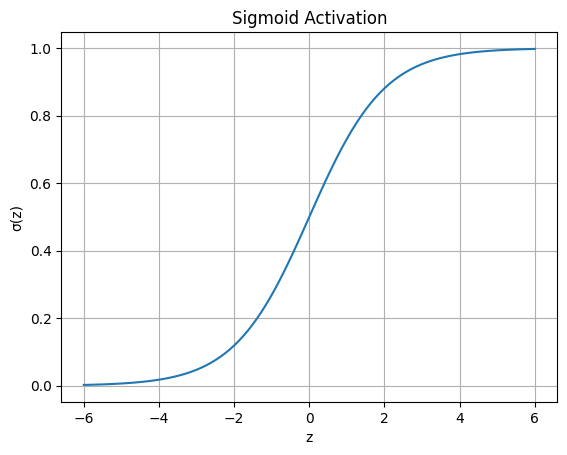

In [5]:
# PyTorch stellt viele Aktivierungsfunktionen bereit:
activation_examples = {
    'Sigmoid': nn.Sigmoid(),
    'ReLU': nn.ReLU(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU(0.01),
}

# Mathematische Form (Beispiel: Sigmoid)
# σ(z) = 1 / (1 + e^{-z})
z = torch.linspace(-6, 6, steps=100)
sigmoid = activation_examples['Sigmoid'](z)

import matplotlib.pyplot as plt
plt.plot(z.cpu(), sigmoid.cpu())
plt.title("Sigmoid Activation")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

## Overview of Popular Loss Functions

##### Normal-Loss-Function:


##### Custom Loss-Function
How to Create a Custom Loss Function?

Define a Python function.

Use PyTorch operations that support autograd (e.g., torch.sum, torch.mean).

Optionally, create a class by subclassing nn.Module

Example 1: Custom Loss as a Function

1. nn.MSELoss: Mean Squared Error Loss
Purpose: Measures the average squared difference between the predicted values and the actual target values.
Common Use: Used in regression tasks where the goal is to predict continuous values.
Example:

In [ ]:
# Regression
mse_loss = nn.MSELoss()

# Klassifikation
cross_entropy = nn.CrossEntropyLoss()

# Beispiel: MSE Loss mit Vektorvergleich
pred = torch.tensor([2.5, 0.0, 2.0, 7.0])
target = torch.tensor([3.0, -0.5, 2.0, 8.0])
loss = mse_loss(pred, target)
print("MSE Loss:", loss.item())

# Beispiel: Cross-Entropy Loss mit Klassifikationslabels
logits = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
labels = torch.tensor([2, 0])  # Klassifikationslabels
cross_entropy_loss = cross_entropy(logits, labels)
print("Cross-Entropy Loss:", cross_entropy_loss.item())

In [ ]:
# Initialize loss function
mse_loss = nn.MSELoss()
# Example predicted and target values
pred = torch.tensor([2.5, 0.0, 2.0, 7.0])
target = torch.tensor([3.0, -0.5, 2.0, 8.0])
# Compute loss
loss = mse_loss(pred, target)
print("MSE Loss:", loss.item())

In [ ]:
# Custom Mean Absolute Error (MAE) Loss
def custom_mae_loss(pred, target):
    return torch.mean(torch.abs(pred - target))

# Example usage
pred = torch.tensor([2.5, 0.0, 2.0, 7.0])
target = torch.tensor([3.0, -0.5, 2.0, 8.0])
loss = custom_mae_loss(pred, target)
print("Custom MAE Loss:", loss.item())

# Example 2: Custom Loss as an nn.Module
class CustomL1Loss(nn.Module):
    def __init__(self):
        super(CustomL1Loss, self).__init__()
    
    def forward(self, pred, target):
        return torch.sum(torch.abs(pred - target))  # L1 loss

# Example usage
loss_fn = CustomL1Loss()
pred = torch.tensor([2.5, 0.0, 2.0, 7.0])
target = torch.tensor([3.0, -0.5, 2.0, 8.0])
loss = loss_fn(pred, target)
print("Custom L1 Loss:", loss.item())

### Optimization

In [6]:
# Beispiel-Netzwerk
net = nn.Sequential(
    nn.Linear(4, 8),
    nn.ReLU(),
    nn.Linear(8, 3)
).to(device)

# Optimizer & Loss
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# Dummy-Daten (3 Klassen)
x_train = torch.randn(5, 4).to(device)
y_train = torch.tensor([0, 1, 2, 1, 0]).to(device)

# Trainingsschleife
for epoch in range(20):
    optimizer.zero_grad()
    y_pred = net(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: loss = {loss.item():.4f}")

Epoch 0: loss = 1.1414
Epoch 5: loss = 1.1267
Epoch 10: loss = 1.1124
Epoch 15: loss = 1.0984


### PyTorch Tips and Benefits

In [ ]:
##### 

# Deep Learning mit PyTorch – Mathematischer Zugang zu Neuronalen Netzen

####  🛠️ Setup & Ressourcen
Sicherstellen, dass PyTorch installiert ist
    pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Optional: Check MPS/CPU/GPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

## Das Perzeptron – Mathematische Grundlage

Ein einfaches Perzeptron modelliert eine lineare Entscheidungsgrenze.
Die mathematische Modellfunktion lautet:
    h_{w,b}(x) = sign(w^T x + b)

Hierbei:
- w ∈ ℝ^M ist der Gewichtungsvektor
- b ∈ ℝ ist der Bias
- x ∈ ℝ^M ist der Eingabevektor

Aktivierungsfunktion:
    sign(z) = +1, falls z ≥ 0
              -1, falls z < 0


In [ ]:
# Beispiel: Einfaches Perzeptron-Modell mit Heaviside-Aktivierung
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        out = self.linear(x)
        return torch.sign(out)

## 📉 Perzeptron-Kriterium (Fehlerfunktion)

Die Perzeptron-Kriteriums-Funktion:
    J_P(w, b) = - ∑_{n ∈ M} y_n (w^T x_n + b)
wobei M die Menge der falsch klassifizierten Beispiele ist.

Gradienten:
    ∂J/∂w = - ∑_{n ∈ M} y_n x_n
    ∂J/∂b = - ∑_{n ∈ M} y_n

In [ ]:






## 🔁 Abschnitt 2: Multi-Layer Perceptron (MLP)

"""
Ein MLP erweitert das einfache Perzeptron um versteckte Schichten.

Modellstruktur:
- Eingabe: x ∈ ℝ^d
- Versteckte Schicht: a^{[1]} = σ(W^{[1]} x + b^{[1]})
- Ausgabe: a^{[2]} = softmax(W^{[2]} a^{[1]} + b^{[2]})

Verwendete Aktivierungsfunktionen:
- σ(z) = 1 / (1 + e^{-z}) (Sigmoid)
- softmax(z)_k = e^{z_k} / ∑_j e^{z_j} (für Klassifikation)

"""

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        z1 = self.hidden(x)
        a1 = torch.sigmoid(z1)
        z2 = self.output(a1)
        a2 = torch.softmax(z2, dim=1)
        return a2

## 🎯 Abschnitt 3: Verlustfunktionen

"""
Für Klassifikationsaufgaben wird typischerweise die Kreuzentropie verwendet:

ℓ_CE(ŷ, y) = - ∑_k y_k log(ŷ_k)

Für Regression:
ℓ_MSE(ŷ, y) = (1/N) ∑ (ŷ_i - y_i)^2

"""

# Beispiel:
loss_fn = nn.CrossEntropyLoss()  # Für Klassifikation

# MSE für Regression
mse_loss = nn.MSELoss()

## 🔍 Abschnitt 4: Backpropagation – Mathematisch erklärt

"""
Gradientenberechnung durch Kettenregel:

Sei ℓ die Verlustfunktion, dann:
    ∂ℓ/∂W^{[l]} = δ^{[l]} · (a^{[l-1]})^T
    ∂ℓ/∂b^{[l]} = δ^{[l]}

Für die letzte Schicht (softmax + crossentropy kombiniert):
    δ^{[L]} = a^{[L]} - y

Für versteckte Schichten:
    δ^{[l]} = (W^{[l+1]})^T δ^{[l+1]} ⊙ σ'(z^{[l]})
"""

## 🔄 Abschnitt 5: Training mit PyTorch

# Beispiel-Setup
model = MLP(input_dim=4, hidden_dim=8, output_dim=3).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy-Trainingsdaten
x_train = torch.randn(10, 4).to(device)
y_train = torch.randint(0, 3, (10,)).to(device)  # Klassenlabels

# Training
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

## 🧠 Abschnitt 6: Erweiterungen & Tricks

"""
- Dropout für Regularisierung
- Batch Normalization für stabileres Training
- Weight Initialization (z. B. Xavier, He)
- Learning Rate Schedulers
- Data Augmentation

"""

## ✨ Abschnitt 7: Tipps zur PyTorch-Nutzung

"""
- Nutze `.to(device)` konsequent
- `model.eval()` und `torch.no_grad()` beim Testen
- `torch.utils.data.Dataset` + `DataLoader` für robuste Pipelines
- TensorBoard (`torch.utils.tensorboard`) für Monitoring
"""



Using device: mps


KeyboardInterrupt: 